## Disaster Tweet Prediction
In this notebook, I will try and create a model to predict disaster tweets using the kaggle nlp getting started dataset

In [13]:
!kaggle competitions download -c nlp-getting-started

nlp-getting-started.zip: Skipping, found more recently modified local copy (use --force to force download)


In [17]:
unzip_data("nlp-getting-started.zip")

In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv("train.csv")

In [7]:
#Lets first see what our data looks like
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [8]:
df.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [10]:
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

## Data Preprocessing
As can be seen above, our "keyword" and "location" columns contain many null values.
To deal with this we will have to drop these features completely, as there is no simple way to deal with those missing values.
Hence, our model will not incorporate these features

In [11]:
df["keyword"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
7608    NaN
7609    NaN
7610    NaN
7611    NaN
7612    NaN
Name: keyword, Length: 7613, dtype: object

In [12]:
#Shuffle the dataframe for use later
df_shuffled = df.sample(frac=1,random_state=42)

In [13]:
df_shuffled

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0
...,...,...,...,...,...
5226,7470,obliteration,Merica!,@Eganator2000 There aren't many Obliteration s...,0
5390,7691,panic,NaN,just had a panic attack bc I don't have enough...,0
860,1242,blood,NaN,Omron HEM-712C Automatic Blood Pressure Monito...,0
7603,10862,NaN,NaN,Officials say a quarantine is in place at an A...,1


In [14]:
df_shuffled["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [15]:
len(df_shuffled)

7613

In [16]:
test_df = pd.read_csv("test.csv")

In [17]:
import random

In [18]:
#We use shuffled data to visualize examples of some tweets.
rand=random.randint(1,7613-5)
for row in df_shuffled[["text","target"]][rand:rand+5].itertuples():
  _,text,target = row
  print(f"index: {_,}, target: {target},text: {text}")

index: (6557,), target: 1,text: Well said Sir. My cousin was a POW. Brutally treated. Survived but never talked about it. The bombing was justified https://t.co/SuDkK1wEEZ
index: (2664,), target: 1,text: @channelstv:That's why terrorism is not d war for d army but for Intel agents who can counter their moves before they detonate their bombs.
index: (5033,), target: 0,text: First impressions: glad hat man is leaving in lieu of more interesting ladies. Hope mudslide lady triumphs next week.
index: (677,), target: 0,text: https://t.co/WKv8VqVkT6 #ArtisteOfTheWeekFact say #Conversations by #coast2coastdjs agree @Crystal_Blaz 's #Jiwonle is a #HipHop #ClubBanger
index: (6073,), target: 1,text: RT twit_san_diego 'Possible sinkhole disrupts trolley service: A depression in a portion of asphalt in downtown SaÛ_ http://t.co/ANrIOMbHQN'


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
#Complete train test split with 10% test set, 90% train set
X_train,X_test,y_train,y_test = train_test_split(df_shuffled["text"],df_shuffled["target"],random_state=42,test_size=0.1)

In [21]:
X_train = X_train.to_numpy()

In [22]:
X_test = X_test.to_numpy()

In [23]:
len(X_train)

6851

In [24]:
X_train.shape

(6851,)

In [23]:
type(X_train)

numpy.ndarray

In [25]:
import tensorflow as tf

In [26]:
X_train

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       ...,
       'Near them on the sand half sunk a shattered visage lies... http://t.co/0kCCG1BT06',
       "kesabaran membuahkan hasil indah pada saat tepat! life isn't about waiting for the storm to pass it's about learning to dance in the rain.",
       "@ScottDPierce @billharris_tv @HarrisGle @Beezersun I'm forfeiting this years fantasy football pool out of fear I may win n get my ass kicked"],
      dtype=object)

# Vectorization
To make text understandable by computers, we have to first turn it into tokens (breaking it down into individual characters and spaces)  and then turn those into numbers which computers can understand.

In [27]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [28]:

text_vectorizer = TextVectorization(max_tokens=None,standardize="lower_and_strip_punctuation",split="whitespace",ngrams=None,output_mode="int",output_sequence_length=None,pad_to_max_tokens=True)

In [29]:
max_vocab_length=10000
max_length = 30
text_vectorizer = TextVectorization(max_tokens=max_vocab_length,output_mode="int",output_sequence_length=max_length)

In [30]:
text_vectorizer.adapt(X_train)

In [31]:
y_train=y_train.to_numpy()
y_test = y_test.to_numpy()

In [32]:
X_train[:10]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk',
       '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
       'destroy the free fandom honestly',
       'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
       '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
       'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
      dtype=object)

In [33]:
#Let's see what our vectorizer does with this sentence
sample_sentence = "Theres a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 30), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0]], dtype=int64)>

In [34]:
X_train.shape

(6851,)

In [ ]:
rand=random.randint(1,7613-5)
for row in df_shuffled[["text","target"]][rand:rand+5].itertuples():
  _,text,target = row
  print(f"index: {_,}, target: {target},text: {text}")
  print(text_vectorizer([text]))
  print("----------------------------------------------------------------")

In [ ]:
from tensorflow.keras import layers

In [92]:
embedding = layers.Embedding(input_dim=max_vocab_length,output_dim=128,input_length=30)


In [ ]:
embedding

In [ ]:
sentence =random.choice(X_train)

In [ ]:
sentence

In [37]:
from sklearn.naive_bayes import ComplementNB

In [38]:
baseline = ComplementNB()

In [39]:
y_train

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [40]:
from sklearn.metrics import accuracy_score,plot_confusion_matrix,classification_report,confusion_matrix,f1_score

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [42]:

vectorizer = TfidfVectorizer(lowercase=True)

In [43]:
X_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [44]:
baseline.fit(X_vect,y_train)

ComplementNB()

In [45]:
preds = baseline.predict(X_test_vect)

In [46]:
preds

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,

In [47]:
confusion_matrix(preds,y_test)

array([[370, 108],
       [ 44, 240]], dtype=int64)

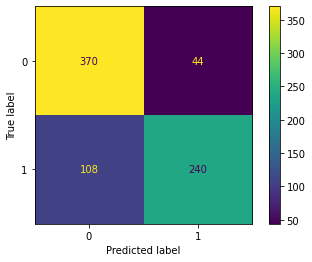

In [48]:
plot_confusion_matrix(baseline,X_test_vect,y_test)

In [57]:
print(classification_report(preds,y_test))
#Decent accuracy with complement NB model

              precision    recall  f1-score   support

           0       0.89      0.77      0.83       478
           1       0.69      0.85      0.76       284

    accuracy                           0.80       762
   macro avg       0.79      0.81      0.79       762
weighted avg       0.82      0.80      0.80       762



In [58]:
from sklearn.model_selection import GridSearchCV

In [105]:
grid_params = {"alpha":[1,2,1.5,1.2,1.1,3,4,2.1,.9]}


In [111]:
base = MultinomialNB()

In [112]:
#Use grid search CV to find optimal hyperparameters
grid = GridSearchCV(estimator=base,param_grid=grid_params)

In [113]:
grid.fit(X_vect,y_train)

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [1, 2, 1.5, 1.2, 1.1, 3, 4, 2.1, 0.9]})

In [114]:
grid.best_estimator_.get_params()

{'alpha': 0.9, 'class_prior': None, 'fit_prior': True}

In [110]:
from sklearn.naive_bayes import MultinomialNB

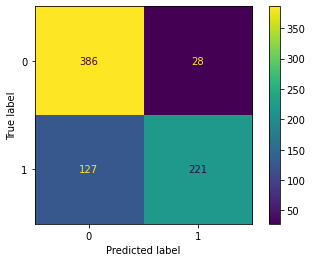

In [115]:
plot_confusion_matrix(grid,X_test_vect,y_test)

In [116]:
preds = grid.predict(X_test_vect)

In [117]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83       414
           1       0.89      0.64      0.74       348

    accuracy                           0.80       762
   macro avg       0.82      0.78      0.79       762
weighted avg       0.81      0.80      0.79       762



In [122]:
f1_score(y_test,preds,average="weighted")

0.7905839110697591

In [119]:
accuracy_score(y_test,preds)

0.7965879265091863

In [49]:
from sklearn.metrics import f1_score

In [50]:
from tensorflow.keras import layers
from tensorflow import keras

# Model 2 = Basic Network with learned embeddings
Using the Embedding layer allows the model to turn vectorized words into an internal representation it can understand. 

In [66]:
inputs = keras.Input(shape=(1,),dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1,activation="sigmoid")(x)

In [70]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 30)                0         
_________________________________________________________________
embedding (Embedding)        (None, 30, 128)           1280000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [68]:
model = keras.Model(inputs,outputs)

In [69]:
model.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [235]:
X_vectorized = text_vectorizer(X_train)
X_vect_test_2 = text_vectorizer(X_test)

In [71]:
X_train

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       ...,
       'Near them on the sand half sunk a shattered visage lies... http://t.co/0kCCG1BT06',
       "kesabaran membuahkan hasil indah pada saat tepat! life isn't about waiting for the storm to pass it's about learning to dance in the rain.",
       "@ScottDPierce @billharris_tv @HarrisGle @Beezersun I'm forfeiting this years fantasy football pool out of fear I may win n get my ass kicked"],
      dtype=object)

In [72]:
model.fit(X_train,y_train,epochs=4,validation_data=(X_test,y_test),callbacks=[create_tensorboard_callback("natural_language",experiment_name="deepnetV1")])

Saving TensorBoard log files to: natural_language/deepnetV1/20210719-193447
Epoch 1/4
215/215 [==============================] - 5s 15ms/step - loss: 0.6693 - accuracy: 0.5774 - val_loss: 0.5967 - val_accuracy: 0.7205
Epoch 2/4
215/215 [==============================] - 3s 13ms/step - loss: 0.5295 - accuracy: 0.7857 - val_loss: 0.4993 - val_accuracy: 0.7927
Epoch 3/4
215/215 [==============================] - 3s 13ms/step - loss: 0.4104 - accuracy: 0.8448 - val_loss: 0.4673 - val_accuracy: 0.8031
Epoch 4/4
215/215 [==============================] - 3s 13ms/step - loss: 0.3450 - accuracy: 0.8670 - val_loss: 0.4590 - val_accuracy: 0.8110


In [73]:
model.evaluate(X_test,y_test)

24/24 [==============================] - 0s 4ms/step - loss: 0.4590 - accuracy: 0.8110


[0.45901796221733093, 0.8110235929489136]

In [74]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath="NL2P",monitor="val_accuracy",save_best_only=True,save_weights_only=True)

In [75]:
from tensorflow.keras.utils import plot_model

In [76]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 30)                0         
_________________________________________________________________
embedding (Embedding)        (None, 30, 128)           1280000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [79]:
X_train.shape

(6851,)

In [80]:
y_train.shape

(6851,)

In [81]:
X_test.shape

(762,)

In [82]:
y_test.shape

(762,)

In [85]:
y_train.shape

(6851,)

In [150]:
y_train

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [153]:
X_vectorized[1]

<tf.Tensor: shape=(30,), dtype=int64, numpy=
array([1514,  209,  485,   18,    1, 2589,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0], dtype=int64)>

In [155]:
y = tf.expand_dims(y_train,axis=-1)

In [156]:
y2 = tf.expand_dims(y_test,axis=-1)

In [158]:
y

<tf.Tensor: shape=(6851, 1), dtype=int64, numpy=
array([[0],
       [0],
       [1],
       ...,
       [1],
       [1],
       [0]], dtype=int64)>

In [160]:
X_vectorized[0]

<tf.Tensor: shape=(30,), dtype=int64, numpy=
array([   1, 6507,    8,  387,   43, 2956,  978,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0], dtype=int64)>

In [86]:
preds = model.predict(X_test)

In [87]:
preds.shape

(762, 1)

In [88]:
#To plot the confusion matrix, we first have to change the dimensions of the predictions.
preds = tf.squeeze(preds)

In [89]:
preds.shape

TensorShape([762])

In [90]:
y_test

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,

In [95]:
confusion_matrix(preds.numpy(),y_test)

array([[364,  94],
       [ 50, 254]], dtype=int64)

In [96]:
f1_score(preds.numpy(),y_test,average="weighted")

0.8126323729430258

In [93]:
preds = tf.round(preds)

In [94]:
preds

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0

In [97]:
words_in_vocab = text_vectorizer.get_vocabulary()

In [98]:
words_in_vocab

['',
 '[UNK]',
 'the',
 'a',
 'in',
 'to',
 'of',
 'and',
 'i',
 'is',
 'for',
 'on',
 'you',
 'my',
 'with',
 'it',
 'that',
 'at',
 'by',
 'this',
 'from',
 'be',
 'are',
 'was',
 'have',
 'like',
 'as',
 'up',
 'so',
 'just',
 'but',
 'me',
 'im',
 'your',
 'not',
 'amp',
 'out',
 'its',
 'will',
 'an',
 'no',
 'has',
 'fire',
 'after',
 'all',
 'when',
 'we',
 'if',
 'now',
 'via',
 'new',
 'more',
 'get',
 'or',
 'about',
 'what',
 'he',
 'people',
 'news',
 'been',
 'over',
 'one',
 'how',
 'dont',
 'they',
 'who',
 'into',
 'were',
 'do',
 'us',
 '2',
 'can',
 'video',
 'emergency',
 'there',
 'disaster',
 'than',
 'police',
 'would',
 'his',
 'still',
 'her',
 'some',
 'body',
 'storm',
 'crash',
 'burning',
 'suicide',
 'back',
 'man',
 'california',
 'why',
 'time',
 'them',
 'had',
 'buildings',
 'rt',
 'first',
 'cant',
 'see',
 'got',
 'day',
 'off',
 'our',
 'going',
 'nuclear',
 'know',
 'world',
 'bomb',
 'fires',
 'love',
 'killed',
 'go',
 'attack',
 'youtube',
 'dead

In [99]:
len(words_in_vocab)

10000

In [100]:
words_in_vocab[:10]

['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is']

In [102]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 30)                0         
_________________________________________________________________
embedding (Embedding)        (None, 30, 128)           1280000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [106]:
embed_weights = model.get_layer("embedding").get_weights()[0]

In [108]:
embed_weights.shape

(10000, 128)

In [109]:
import io

In [110]:
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

# LSTM Network

In [124]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,),dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.LSTM(64,return_sequences=True)(x)
x = layers.LSTM(64)(x)
x = layers.Dense(64,activation="relu")(x)
outputs = layers.Dense(1,activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs,outputs)

In [125]:
model_2.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [126]:
X_train.shape

(6851,)

In [127]:
model_2.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 30)                0         
_________________________________________________________________
embedding (Embedding)        (None, 30, 128)           1280000   
_________________________________________________________________
lstm_7 (LSTM)                (None, 30, 64)            49408     
_________________________________________________________________
lstm_8 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65  

In [128]:
model_2_history = model_2.fit(X_train,y_train,epochs=6,validation_data=(X_test,y_test),callbacks=[create_tensorboard_callback("natural_language",experiment_name="deepnetV1")])

Saving TensorBoard log files to: natural_language/deepnetV1/20210719-205351
Epoch 1/6
215/215 [==============================] - 7s 23ms/step - loss: 0.2598 - accuracy: 0.9218 - val_loss: 0.7523 - val_accuracy: 0.7690
Epoch 2/6
215/215 [==============================] - 4s 19ms/step - loss: 0.0744 - accuracy: 0.9736 - val_loss: 0.9779 - val_accuracy: 0.7743
Epoch 3/6
215/215 [==============================] - 4s 19ms/step - loss: 0.0574 - accuracy: 0.9780 - val_loss: 1.1572 - val_accuracy: 0.7717
Epoch 4/6
215/215 [==============================] - 4s 20ms/step - loss: 0.0514 - accuracy: 0.9800 - val_loss: 1.1995 - val_accuracy: 0.7861
Epoch 5/6
215/215 [==============================] - 4s 20ms/step - loss: 0.0532 - accuracy: 0.9760 - val_loss: 1.1089 - val_accuracy: 0.7664
Epoch 6/6
215/215 [==============================] - 4s 20ms/step - loss: 0.0420 - accuracy: 0.9793 - val_loss: 0.9785 - val_accuracy: 0.7769y: 0.98 - ETA: 3s - loss: 0.038 -


# Alternating LSTM and GRU network

In [137]:
inputs = layers.Input(shape=(1,),dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64,return_sequences=True)(x)
x = layers.LSTM(64,return_sequences=True)(x)
x = layers.GRU(64,return_sequences=True)(x)
x = layers.LSTM(64)(x)
outputs = layers.Dense(1,activation="sigmoid")(x)


In [138]:
model_3 = tf.keras.Model(inputs,outputs)

In [139]:
model_3.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [140]:
model_3.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 30)                0         
_________________________________________________________________
embedding (Embedding)        (None, 30, 128)           1280000   
_________________________________________________________________
gru_3 (GRU)                  (None, 30, 64)            37248     
_________________________________________________________________
lstm_10 (LSTM)               (None, 30, 64)            33024     
_________________________________________________________________
gru_4 (GRU)                  (None, 30, 64)            24960     
_________________________________________________________________
lstm_11 (LSTM)               (None, 64)                3302

In [141]:
model_3.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test),callbacks=[create_tensorboard_callback("natural_language","deepnetV3")])

Saving TensorBoard log files to: natural_language/deepnetV3/20210719-214456
Epoch 1/5
215/215 [==============================] - 11s 34ms/step - loss: 0.1869 - accuracy: 0.9372 - val_loss: 0.9687 - val_accuracy: 0.7625
Epoch 2/5
215/215 [==============================] - 6s 27ms/step - loss: 0.0573 - accuracy: 0.9794 - val_loss: 1.3797 - val_accuracy: 0.7598
Epoch 3/5
215/215 [==============================] - 5s 24ms/step - loss: 0.0467 - accuracy: 0.9809 - val_loss: 1.3512 - val_accuracy: 0.7625
Epoch 4/5
215/215 [==============================] - 5s 25ms/step - loss: 0.0506 - accuracy: 0.9787 - val_loss: 1.3378 - val_accuracy: 0.7598 0s - loss: 0.0507 - accu
Epoch 5/5
215/215 [==============================] - 5s 25ms/step - loss: 0.0553 - accuracy: 0.9781 - val_loss: 1.1183 - val_accuracy: 0.7546


In [135]:
model_3.evaluate(X_test,y_test)

24/24 [==============================] - 0s 5ms/step - loss: 1.1905 - accuracy: 0.7690


[1.1904761791229248, 0.7690288424491882]

# Bidirectional LSTM Network

In [157]:
inputs = layers.Input(shape=(1,),dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional(layers.LSTM(64,return_sequences=True))(x)
x = layers.Bidirectional(layers.GRU(64))(x)
outputs = layers.Dense(1,activation="sigmoid")(x)

In [158]:
model_4 = tf.keras.Model(inputs,outputs)

In [159]:
model_4.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [160]:
model_4.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 30)                0         
_________________________________________________________________
embedding (Embedding)        (None, 30, 128)           1280000   
_________________________________________________________________
bidirectional_4 (Bidirection (None, 30, 128)           98816     
_________________________________________________________________
bidirectional_5 (Bidirection (None, 128)               74496     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 129       
Total params: 1,453,441
Trainable params: 1,453,441
Non-trainable params: 0
________________________________________________

In [161]:
model_4.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=4,callbacks=[create_tensorboard_callback("natural_language","deepNetV4")])

Saving TensorBoard log files to: natural_language/deepNetV4/20210719-215843
Epoch 1/4
215/215 [==============================] - 11s 32ms/step - loss: 0.1686 - accuracy: 0.9514 - val_loss: 1.3221 - val_accuracy: 0.7507
Epoch 2/4
215/215 [==============================] - 5s 24ms/step - loss: 0.0377 - accuracy: 0.9841 - val_loss: 1.2969 - val_accuracy: 0.7638
Epoch 3/4
215/215 [==============================] - 5s 25ms/step - loss: 0.0305 - accuracy: 0.9828 - val_loss: 1.5293 - val_accuracy: 0.7612
Epoch 4/4
215/215 [==============================] - 6s 27ms/step - loss: 0.0361 - accuracy: 0.9821 - val_loss: 1.4035 - val_accuracy: 0.7743


# Convolutional Network

In [187]:
inputs = layers.Input(shape=(1,),dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=32,kernel_size=5,activation="relu")(x)
x = layers.MaxPool1D()(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1,activation="sigmoid")(x)

In [188]:
model_5 = keras.Model(inputs,outputs)

In [189]:
model_5.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [190]:
model_5.summary()

Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 30)                0         
_________________________________________________________________
embedding (Embedding)        (None, 30, 128)           1280000   
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 26, 32)            20512     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 13, 32)            0         
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 33 

In [191]:
model_5.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=4,callbacks=[create_tensorboard_callback("natural_language","deepNetV5")])

Saving TensorBoard log files to: natural_language/deepNetV5/20210719-220937
Epoch 1/4
215/215 [==============================] - 4s 17ms/step - loss: 0.1815 - accuracy: 0.9431 - val_loss: 0.9683 - val_accuracy: 0.7651
Epoch 2/4
215/215 [==============================] - 3s 15ms/step - loss: 0.0515 - accuracy: 0.9782 - val_loss: 1.1522 - val_accuracy: 0.7638
Epoch 3/4
215/215 [==============================] - 3s 15ms/step - loss: 0.0349 - accuracy: 0.9835 - val_loss: 1.2843 - val_accuracy: 0.7598
Epoch 4/4
215/215 [==============================] - 3s 16ms/step - loss: 0.0341 - accuracy: 0.9847 - val_loss: 1.3775 - val_accuracy: 0.7638


In [52]:
import tensorflow_hub as hub


In [53]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [54]:
embed_samples = embed(["I am such a legend","I am very good."])
print(embed_samples[0][:50])

tf.Tensor(
[ 0.05113553 -0.02307166 -0.00609056 -0.03486585  0.07317686 -0.06400849
  0.03715741  0.00660929  0.07833844  0.04172025  0.04418441 -0.08348105
  0.04847017  0.03066     0.00503718 -0.07492416 -0.0081763   0.03127342
 -0.01839563 -0.04674343 -0.06454448 -0.05914024  0.03709841  0.09497422
 -0.02682083  0.02267443 -0.02484054 -0.07284914  0.10012221 -0.02113599
 -0.00293459 -0.01987312  0.04693316  0.03961666  0.03772699  0.01755405
 -0.02627961 -0.01546121 -0.05905557 -0.05011924  0.00144393 -0.07420877
  0.03885365  0.00450332 -0.01194213 -0.02253363 -0.07058066  0.01393341
  0.06327489 -0.00622861], shape=(50,), dtype=float32)


In [55]:
embed_samples.shape

TensorShape([2, 512])

In [56]:
sentence_encoder = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",input_shape=[],dtype=tf.string,trainable=False,name="USE")

In [74]:
model_6 = tf.keras.Sequential([
    sentence_encoder,
    layers.RNN(layers.LSTMCell(64),return_sequences=True),
    layers.Dense(64,activation="relu"),
    layers.Dense(1,activation="sigmoid")
])

TypeError: int() argument must be a string, a bytes-like object or a number, not 'NoneType'

In [67]:
model_6.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [68]:
model_6.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
USE (KerasLayer)             (None, 512)               256797824 
_________________________________________________________________
dense_3 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [69]:
model_6.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=4,callbacks=[create_tensorboard_callback("natural_language","deepNetV6-USE")])

Saving TensorBoard log files to: natural_language/deepNetV6-USE/20210720-072258
Epoch 1/4
215/215 [==============================] - 5s 20ms/step - loss: 0.5804 - accuracy: 0.7472 - val_loss: 0.4496 - val_accuracy: 0.8045
Epoch 2/4
215/215 [==============================] - 4s 16ms/step - loss: 0.4114 - accuracy: 0.8158 - val_loss: 0.4418 - val_accuracy: 0.8097
Epoch 3/4
215/215 [==============================] - 4s 16ms/step - loss: 0.3990 - accuracy: 0.8254 - val_loss: 0.4330 - val_accuracy: 0.8136
Epoch 4/4
215/215 [==============================] - 4s 17ms/step - loss: 0.3827 - accuracy: 0.8374 - val_loss: 0.4298 - val_accuracy: 0.8110


In [77]:
len(df_shuffled)*0.1

761.3000000000001

In [107]:
df_shuffled

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0
...,...,...,...,...,...
5226,7470,obliteration,Merica!,@Eganator2000 There aren't many Obliteration s...,0
5390,7691,panic,NaN,just had a panic attack bc I don't have enough...,0
860,1242,blood,NaN,Omron HEM-712C Automatic Blood Pressure Monito...,0
7603,10862,NaN,NaN,Officials say a quarantine is in place at an A...,1


In [108]:
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [79]:
data_10_percent = df_shuffled[:761]

In [80]:
X_train_10_percent = data_10_percent[["text"]]
y_train_10_percent = data_10_percent[["target"]]

In [109]:
X_train

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       ...,
       'Near them on the sand half sunk a shattered visage lies... http://t.co/0kCCG1BT06',
       "kesabaran membuahkan hasil indah pada saat tepat! life isn't about waiting for the storm to pass it's about learning to dance in the rain.",
       "@ScottDPierce @billharris_tv @HarrisGle @Beezersun I'm forfeiting this years fantasy football pool out of fear I may win n get my ass kicked"],
      dtype=object)

In [111]:
len(X_test)

762

In [113]:
X_train,X_train_10_percent,y_test2,y_test_10_percent = train_test_split(X_train,y_train,test_size=0.1,random_state=42)

In [81]:
y_train_10_percent

,target
2644,1
2227,0
5448,1
132,0
6845,0
...,...
1153,1
1034,0
3107,0
4379,0


In [82]:
X_train_10_percent

,text
2644,So you have a new weapon that can cause un-ima...
2227,The f$&amp;@ing things I do for #GISHWHES Just...
5448,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...
132,Aftershock back to school kick off was great. ...
6845,in response to trauma Children of Addicts deve...
...,...
1153,Today is the day Hiroshima got Atomic bomb 70 ...
1034,@Deeeznvtzzz bring the body bags tho
3107,Fr cuz I risk being electrocuted every shower ...
4379,RT NotExplained: The only known image of infam...


In [83]:
X_train_10_percent = X_train_10_percent["text"]

In [86]:
X_train_10_percent = X_train_10_percent.to_numpy()

In [87]:
y_train_10_percent = y_train_10_percent["target"].to_numpy()

In [115]:
model_7 = tf.keras.Sequential([
    sentence_encoder,
    layers.Dense(64,activation="relu"),
    layers.Dense(1,activation="sigmoid")
])

In [90]:
sentence_encoder(["I am such a legend"])

<tf.Tensor: shape=(1, 512), dtype=float32, numpy=
array([[ 5.11355251e-02, -2.30716784e-02, -6.09055255e-03,
        -3.48658040e-02,  7.31768385e-02, -6.40084743e-02,
         3.71574238e-02,  6.60931272e-03,  7.83384442e-02,
         4.17202413e-02,  4.41844054e-02, -8.34810510e-02,
         4.84701917e-02,  3.06599531e-02,  5.03714476e-03,
        -7.49241710e-02, -8.17631371e-03,  3.12734395e-02,
        -1.83956530e-02, -4.67434265e-02, -6.45444840e-02,
        -5.91402538e-02,  3.70984413e-02,  9.49742049e-02,
        -2.68208105e-02,  2.26744208e-02, -2.48405896e-02,
        -7.28491321e-02,  1.00122213e-01, -2.11359374e-02,
        -2.93460186e-03, -1.98731143e-02,  4.69331332e-02,
         3.96166742e-02,  3.77270058e-02,  1.75540056e-02,
        -2.62796097e-02, -1.54611999e-02, -5.90555742e-02,
        -5.01192100e-02,  1.44393218e-03, -7.42087811e-02,
         3.88536192e-02,  4.50332509e-03, -1.19421659e-02,
        -2.25335993e-02, -7.05806538e-02,  1.39334137e-02,
      

In [116]:
model_7.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [117]:
model_7.fit(X_train_10_percent,y_test_10_percent,validation_data=(X_test,y_test),epochs=5)

Epoch 1/5
22/22 [==============================] - 2s 66ms/step - loss: 0.6747 - accuracy: 0.6364 - val_loss: 0.6446 - val_accuracy: 0.6732
Epoch 2/5
22/22 [==============================] - 1s 33ms/step - loss: 0.6015 - accuracy: 0.8139 - val_loss: 0.5907 - val_accuracy: 0.7402
Epoch 3/5
22/22 [==============================] - 1s 34ms/step - loss: 0.5268 - accuracy: 0.8251 - val_loss: 0.5415 - val_accuracy: 0.7572
Epoch 4/5
22/22 [==============================] - 1s 33ms/step - loss: 0.4690 - accuracy: 0.8447 - val_loss: 0.5086 - val_accuracy: 0.7703
Epoch 5/5
22/22 [==============================] - 1s 33ms/step - loss: 0.4097 - accuracy: 0.8577 - val_loss: 0.4909 - val_accuracy: 0.7795
